## Lab 4: Project (Titanic)
###  Lab 4 – Predicting a Continuous Target with Regression (Titanic) 

**Author:** Sandra Ruiz 
**Date:** April 03,2025 
**Objective:** In this lab, we’ll predict fare, the amount of money paid for the journey, using features in the Titanic dataset



## Introduction:
This project will incorporate different models and examine various features in the Titanic dataset to predict fares and explore specific questions regarding the analysis.




## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [ ]:
### Imports Needed:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Section 1. Load and Explore the Data

In [ ]:




### 1.1 Load the dataset and display the first 10 rows

import seaborn as sns  # Import seaborn


# Load Titanic dataset from seaborn and display the first 10 rows
titanic = sns.load_dataset("titanic")
print(titanic.head(10))


# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True




## Section 2. Data Exploration and Preparation

In the cell below:
Impute missing values for age using median
Drop rows with missing fare (or impute if preferred)
Create numeric variables (e.g., family_size from sibsp + parch + 1)
Optional - convert categorical features (e.g. sex, embarked) if you think they might help your prediction model. (We do not know relationships until we evaluate things.)

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [9]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display dataset info and summary
print(titanic.info())      
print(titanic.describe())  # Summary statistics
print(titanic.isnull().sum())  # Count of missing values

#  Impute missing values for 'age' using median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

#  Drop rows with missing 'fare' values
titanic.dropna(subset=['fare'], inplace=True)

# Create 'family_size' as a new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical variables
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})  # Encode 'sex' as 0 and 1
titanic['embarked'].fillna('S', inplace=True)  
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)  

# Check for remaining missing values**
print(titanic.isnull().sum())

# Display first few rows after preprocessing
print(titanic.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

C:\Users\19564\AppData\Local\Temp\ipykernel_18536\985906470.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\19564\AppData\Local\Temp\ipykernel_18536\985906470.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

## Section 3. Feature Selection and Justification
Define multiple combinations of features to use as inputs to predict fare.

Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time. 

Remember the inputs, usually X, are a 2D array. The target is a 1D array. 



In [ ]:
# Case 1. age only

# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']
 

# Case 2. family_size only

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']
 

# Case 3. age and family size

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']
 

# Case 4. Your choice - see below - fill in your variable(s) below. If you use sex or other category, convert to numeric value in Section 2 above before using. 

# Case 4. 
X4 = titanic[['pclass', 'sex']]
y4 = titanic['fare']


Reflection Questions - answer these in your notebook (in a Markdown cell):

Why might these features affect a passenger’s fare:

For age there could be different prices for different age groups such as children and adults.
The family size could affect fare such as by discounts for larger families or a large family could travel in a lower class to afford all members. For Pclass the  Higher-class tickets cost more than the lower-class tickets. For Sex, there may be an indirect relationship between sex and fare due to social or economic factors.

List all available features:
- survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone.

Which other features could improve predictions and why: 

The feature Embarked because different ports may have different ticket pricing structures. Deck because the Higher decks might have more expensive accommodations. And Alone because Solo travelers may have different fare trends compared to families.

How many variables are in your Case 4: 2 varialbles

Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: pclass and sex  because these features provide a mix of economic status and social influences that in turn has a relationship on ticket pricing, making them strong features for predicting fare.

## Section 4. Train a Regression Model (Linear Regression)
 

4.1 Split the Data

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

4.2 Train and Evaluate Linear Regression Models (all 4 cases)


We'll use a more concise approach - create each model and immediately call the fit() method. 

In [ ]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

# TODO: repeat for case 3 and 4 .... 

4.3 Report Performance

In [ ]:
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y1_pred_test, squared=False))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))

# TODO: Repeat for Cases 2-4....

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import pandas as pd

# Load dataset
titanic = sns.load_dataset("titanic")

# Fill missing values and preprocess data
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.dropna(subset=['fare'], inplace=True)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})  # Encode sex as numeric

# Feature sets and target variable
X1, y1 = titanic[['age']], titanic['fare']
X2, y2 = titanic[['family_size']], titanic['fare']
X3, y3 = titanic[['age', 'family_size']], titanic['fare']
X4, y4 = titanic[['pclass', 'sex']], titanic['fare']

# Train-test split
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]
splits = [train_test_split(X, y, test_size=0.2, random_state=123) for X, y in datasets]

# Train models and store results
models = []
predictions = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = LinearRegression().fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    models.append(model)
    predictions.append((y_pred_train, y_pred_test))
    
    # Evaluate model
    print(f"Case {i+1}:")
    print(f"  Training R²: {r2_score(y_train, y_pred_train):.4f}")
    print(f"  Test R²: {r2_score(y_test, y_pred_test):.4f}")
    print(f"  Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.4f}")
    print(f"  Test MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
    print("-" * 50)





Case 1:
  Training R²: 0.0100
  Test R²: 0.0034
  Test RMSE: 37.9716
  Test MAE: 25.2864
--------------------------------------------------
Case 2:
  Training R²: 0.0499
  Test R²: 0.0222
  Test RMSE: 37.6115
  Test MAE: 25.0253
--------------------------------------------------
Case 3:
  Training R²: 0.0735
  Test R²: 0.0498
  Test RMSE: 37.0778
  Test MAE: 24.2849
--------------------------------------------------
Case 4:
  Training R²: 0.3090
  Test R²: 0.3399
  Test RMSE: 30.9035
  Test MAE: 20.3997
--------------------------------------------------


C:\Users\19564\AppData\Local\Temp\ipykernel_18536\1811333454.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-

### Section 4 Reflection Questions - answer these in your notebook:

Compare the train vs test results for each.

Did Case 1 overfit or underfit?
 Explain: underfitting, Training R2 at 0.01 and Test R2 0.0034 are both low and not capturing meaningful data with age.

Did Case 2 overfit or underfit?
 Explain: underfitting, Both Training R2 and Test R2 are low and is being too general, not capturing the relationship of the family size.

Did Case 3 overfit or underfit? 
Explain: underfiitting, both values for Training R2 and Test R2 are low, so model is too simple, not picking up complex relationship between age and family size.

Did Case 4 overfit or underfit?
 Explain: Neither it is balanced. Both Training R2 and Test R2 are close to values and are much higher than cases 1,2, and 3 so is a good predictor with these features of pclass and sex for fare predictions.

Adding Age
Did adding age improve the model: yes , improved slightly.

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):
 From case 1 of just age to case 3 age and family size the Training and Test R2 went increased which can suggest age varies on fare predictions such as discounted tickets for younger passengers.

Worst

Which case performed the worst: Case 1

How do you know: The Training and Test R2 wer the lowest among all the cases

Do you think adding more training data would improve it (and why/why not):
 No, it is too weak on its own features, needs other features to be added.

Best

Which case performed the best: Case 4

How do you know: The features of pclass and sex has the highest R2 values of all the cases and lowest RMSE and MAE for low error rate.

Do you think adding more training data would improve it (and why/why not): 
yes, certain feautures have help the training data such as embarked, as different ports may have different fare prices.

## Section 5. Compare Alternative Models
In this section, we will take the best-performing case and explore other regression models.

### 5.1 Ridge Regression (L2 penalty)
Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.

This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.

Penalty term: L2 = sum of squared weights
Effect: Shrinks weights, helps reduce overfitting, keeps all features

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)
y_pred_ridge = ridge_model.predict(X1_test)

In [16]:
# With best case 4:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Extract train-test split for Case 4
X4_train, X4_test, y4_train, y4_test = splits[3]  # Case 4 is the fourth dataset

# Initialize and train Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)

# Make predictions
y_pred_ridge_train = ridge_model.predict(X4_train)
y_pred_ridge_test = ridge_model.predict(X4_test)

# Evaluate performance
ridge_train_r2 = r2_score(y4_train, y_pred_ridge_train)
ridge_test_r2 = r2_score(y4_test, y_pred_ridge_test)
ridge_test_rmse = mean_squared_error(y4_test, y_pred_ridge_test, squared=False)
ridge_test_mae = mean_absolute_error(y4_test, y_pred_ridge_test)

# Print results
print("Case 4 - Ridge Regression Results:")
print(f"Training R²: {ridge_train_r2:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")
print(f"Test RMSE: {ridge_test_rmse:.4f}")
print(f"Test MAE: {ridge_test_mae:.4f}")
print("-" * 50)






Case 4 - Ridge Regression Results:
Training R²: 0.3090
Test R²: 0.3405
Test RMSE: 30.8905
Test MAE: 20.3613
--------------------------------------------------


c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 5.2 Elastic Net (L1 + L2 combined)
Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection.

Penalty term: L1 = sum of absolute values of weights
Effect: Can shrink some weights to zero (drops features), simplifies the model
Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.

We control the balance with a parameter called l1_ratio:

If l1_ratio = 0, it behaves like Ridge
If l1_ratio = 1, it behaves like Lasso
Values in between mix both types
Penalty term: α × (L1 + L2)
Effect: Shrinks weights and can drop some features — flexible and powerful

In [ ]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)
y_pred_elastic = elastic_model.predict(X1_test)

In [17]:
# With Case 4:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Extract train-test split for Case 4
X4_train, X4_test, y4_train, y4_test = splits[3]  # Case 4 is the fourth dataset

# Initialize and train ElasticNet model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)

# Make predictions
y_pred_elastic_train = elastic_model.predict(X4_train)
y_pred_elastic_test = elastic_model.predict(X4_test)

# Evaluate performance
elastic_train_r2 = r2_score(y4_train, y_pred_elastic_train)
elastic_test_r2 = r2_score(y4_test, y_pred_elastic_test)
elastic_test_rmse = mean_squared_error(y4_test, y_pred_elastic_test, squared=False)
elastic_test_mae = mean_absolute_error(y4_test, y_pred_elastic_test)

# Print results
print("Case 4 - ElasticNet Regression Results:")
print(f"Training R²: {elastic_train_r2:.4f}")
print(f"Test R²: {elastic_test_r2:.4f}")
print(f"Test RMSE: {elastic_test_rmse:.4f}")
print(f"Test MAE: {elastic_test_mae:.4f}")
print("-" * 50)


Case 4 - ElasticNet Regression Results:
Training R²: 0.2979
Test R²: 0.3685
Test RMSE: 30.2254
Test MAE: 19.1841
--------------------------------------------------


c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 5.3 Polynomial Regression
Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit

In [ ]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)
 

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X1_test_poly)

In [18]:
# With Case 4:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Extract train-test split for Case 4
X4_train, X4_test, y4_train, y4_test = splits[3]  # Case 4 is the fourth dataset

# Set up the polynomial features (degree=3 for cubic features)
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)

# Make predictions
y_pred_poly_train = poly_model.predict(X4_train_poly)
y_pred_poly_test = poly_model.predict(X4_test_poly)

# Evaluate performance
poly_train_r2 = r2_score(y4_train, y_pred_poly_train)
poly_test_r2 = r2_score(y4_test, y_pred_poly_test)
poly_test_rmse = mean_squared_error(y4_test, y_pred_poly_test, squared=False)
poly_test_mae = mean_absolute_error(y4_test, y_pred_poly_test)

# Print results
print("Case 4 - Polynomial Regression (Degree=3) Results:")
print(f"Training R²: {poly_train_r2:.4f}")
print(f"Test R²: {poly_test_r2:.4f}")
print(f"Test RMSE: {poly_test_rmse:.4f}")
print(f"Test MAE: {poly_test_mae:.4f}")
print("-" * 50)



Case 4 - Polynomial Regression (Degree=3) Results:
Training R²: 0.3799
Test R²: 0.4463
Test RMSE: 28.3043
Test MAE: 17.6147
--------------------------------------------------


c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)
Choose a case with just one input feature and plot it. For example:

In [ ]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

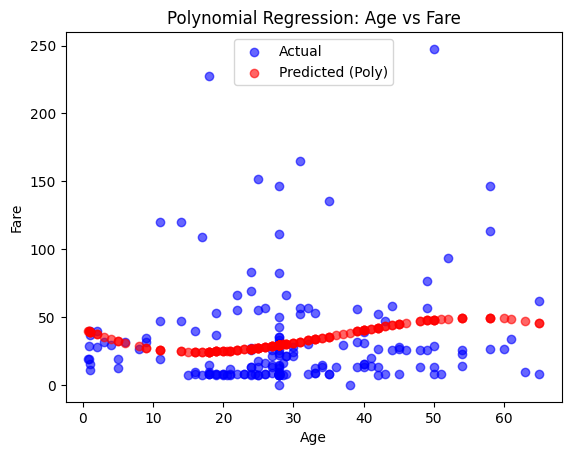

In [21]:
# With Case 1- Age

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Extract train-test split for Case 1
X1_train, X1_test, y1_train, y1_test = splits[0]

# Create Polynomial Features (Degree 3)
poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

# Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X1_train_poly, y1_train)

# Predictions
y_pred_poly = poly_model.predict(X1_test_poly)

# Sort values for better visualization
sorted_indices = np.argsort(X1_test.values.flatten())  
X1_test_sorted = X1_test.values.flatten()[sorted_indices]  
y1_test_sorted = y1_test.values.flatten()[sorted_indices]  
y_pred_poly_sorted = y_pred_poly[sorted_indices]  

# Scatter Plot for Case 1
plt.scatter(X1_test_sorted, y1_test_sorted, color='blue', label='Actual', alpha=0.6)
plt.scatter(X1_test_sorted, y_pred_poly_sorted, color='red', label='Predicted (Poly)', alpha=0.6)

# Labels and title
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Polynomial Regression: Age vs Fare")

# Show plot
plt.show()




### 5.4 Reflections (in a Markdown cell):

What patterns does the cubic model seem to capture: 

It captures non-linear relationships between age and fare.

Where does it perform well or poorly:

It performs weel by capturing fluctuations that a straight-line regression misses. It may perform poorly by overfitting if the data as outliers.

Did the polynomial fit outperform linear regression: Yes

Where (on the graph or among which kinds of data points) does it fit best: 

The actual data captured shows the complex data captured that does not fall in a straight line as with the linear regression.

### 5.4 Compare All Models
Create a summary table or printout comparing all models:

In [ ]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y1_test, y1_pred_test)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

In [ ]:
import pandas as pd

# Creating a DataFrame with the data:
data = {
    'Model': ['Linear', 'Ridge', 'ElasticNet', 'Polynomial'],
    'Training R²': [0.3090, 0.3090, 0.2979, 0.3799],
    'Test R²': [0.3399, 0.3405, 0.3685, 0.4463],
    'Test RMSE': [30.9035, 30.8905, 30.2254, 28.3043],
    'Test MAE': [20.3997, 20.3613, 19.1841, 17.6147]
}

df = pd.DataFrame(data)

# Display the table
df


,Model,Training R²,Test R²,Test RMSE,Test MAE
0,Linear,0.3090,0.3399,30.9035,20.3997
1,Ridge,0.3090,0.3405,30.8905,20.3613
2,ElasticNet,0.2979,0.3685,30.2254,19.1841
3,Polynomial,0.3799,0.4463,28.3043,17.6147


### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

Use the same single input case as you visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result. 



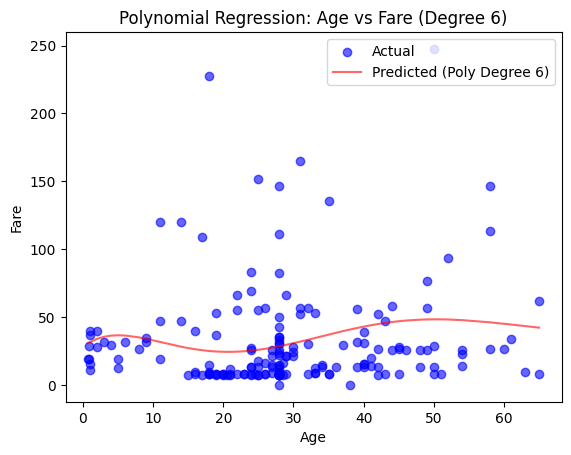

In [26]:
# with Case 1- Age

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming splits[0] is already available as your train-test split for Case 1
X1_train, X1_test, y1_train, y1_test = splits[0]

# Create Polynomial Features with degree 6
poly = PolynomialFeatures(degree=6)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

# Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X1_train_poly, y1_train)

# Predictions
y_pred_poly = poly_model.predict(X1_test_poly)

# Sort values for better visualization
sorted_indices = np.argsort(X1_test.values.flatten())  
X1_test_sorted = X1_test.values.flatten()[sorted_indices]  
y1_test_sorted = y1_test.values.flatten()[sorted_indices]  
y_pred_poly_sorted = y_pred_poly[sorted_indices]  

# Scatter Plot for Case 1
plt.scatter(X1_test_sorted, y1_test_sorted, color='blue', label='Actual', alpha=0.6)
plt.plot(X1_test_sorted, y_pred_poly_sorted, color='red', label='Predicted (Poly Degree 6)', alpha=0.6)

# Labels and title
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Polynomial Regression: Age vs Fare (Degree 6)")

# Show plot
plt.show()


In a Markdown cell, tell us which option seems to work better - your initial cubic (3) or your higher order and why. 

I think the cubic (3) is better than that of the (6) it has a smoother curve, and the data points on the 6 are more spaced out, which can indicate overfitting. 

### Section 6. Final Thoughts & Insights
Your notebook should tell a data story. Use this section to demonstrate your thinking and value as an analyst.

6.1 Summarize Findings
What features were most useful? The sex feature and pclass for good predictions on the fare.

What regression model performed best? The polynomial with Degree 3 had the highest Training and Test R2 and lowest RMSE and MAE for lower error rate.

How did model complexity or regularization affect results? Too simple such as linear regression did not give good results, the polynomial gave a balanced approach with good data insights of the complexity of non linear factors.

 

6.2 Discuss Challenges
Was fare hard to predict? Why?

yes, some features alone such as age by itself is not a good predictor, other features are needed such as sex and pclase.

Did skew or outliers impact the models?

yes, skew and outlier did impact the models, the polynomial 6 compared to the 3 model was skewed and doing overfitting.

 


